To start, importing the necessary libraries using the following codes:

In [1]:
import matplotlib.pyplot as plt
from PIL import Image
import seaborn as sns
import pandas as pd
import os

The below code counts the number of images for each class in the 'datathon 2022 dataset' directory, using the os.listdir() function to list the files in each subdirectory.

The counts are stored in a Pandas dataframe, with one row for each class and columns for the class name and the number of images in that class.

The dataframe can be used to analyze the distribution of the different classes in the dataset, which can be useful for understanding the balance of the dataset and determining if any classes are significantly over- or underrepresented.

In [2]:
directory = 'datathon 2022 dataset'

# get number of images for each class
num_acne = len(os.listdir(directory + '/Acne'))
num_cyst = len(os.listdir(directory + '/Cyst, tumour and skin-tags'))
num_melanoma = len(os.listdir(directory + '/Melanoma'))
num_normal = len(os.listdir(directory + '/Normal skin'))
num_moneypox = len(os.listdir(directory + '/Moneypox'))

# create a dataframe to store the data
df = pd.DataFrame({'class': ['Acne', 'Cyst', 'Melanoma', 'Normal skin', 'Moneypox'],
                   'num_images': [num_acne, num_cyst, num_melanoma, num_normal, num_moneypox]})

In [3]:
print("total number of images: ", (num_acne + num_cyst+num_melanoma+num_normal+num_moneypox))

total number of images:  3000


The code above calculates the total number of images in the dataset by adding up the number of images in each class. The total number of images in the dataset is 3000.

In [4]:
# toatl number of images for each class
print('acne:', num_acne, ' cyst:', num_cyst, ' melanoma:', num_melanoma, ' normal:', num_normal, ' moneypox:', num_moneypox)

acne: 400  cyst: 600  melanoma: 600  normal: 700  moneypox: 700


It appears that the dataset contains a total of 400 acne images, 600 cyst images, 600 melanoma images, 700 normal skin images, and 700 monkeypox images.

In the case of the 'datathon 2022 dataset', it appears that the data is unbalanced, as the number of images for acne is 400 and for moneypox is 700

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   class       5 non-null      object
 1   num_images  5 non-null      int64 
dtypes: int64(1), object(1)
memory usage: 208.0+ bytes


Now lets visually inspect the number of images for each class to get a better understanding of the unbalanceness.

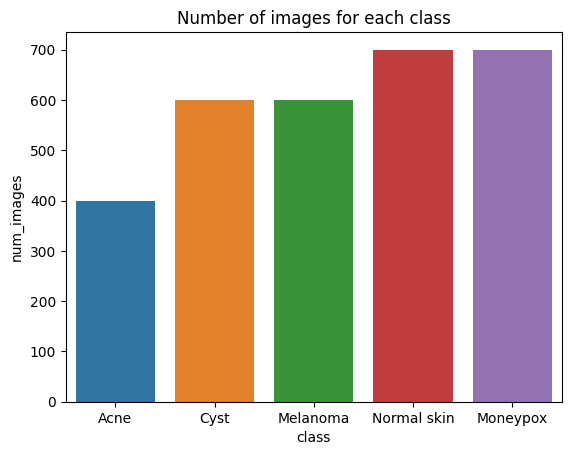

In [6]:
# seaborn barplot
sns.barplot(x='class', y='num_images', data=df)
plt.title('Number of images for each class')
plt.show()

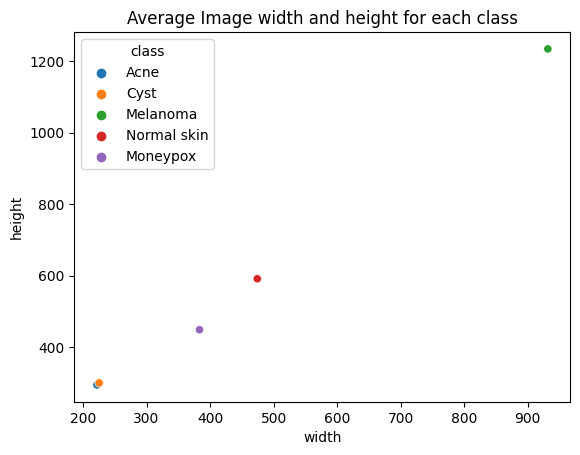

In [7]:
# scatter plot width and height for each class with tensorflow
import tensorflow as tf
import numpy as np

# get the image width and height for each class


def get_image_size(directory):
    width = []
    height = []
    for filename in os.listdir(directory):
        img = tf.io.read_file(directory + '/' + filename)
        img = tf.image.decode_jpeg(img, channels=3)
        width.append(img.shape[0])
        height.append(img.shape[1])
    return width, height


# get the image width and height for each class
acne_width, acne_height = get_image_size(directory + '/Acne')
cyst_width, cyst_height = get_image_size(
    directory + '/Cyst, tumour and skin-tags')
melanoma_width, melanoma_height = get_image_size(directory + '/Melanoma')
normal_width, normal_height = get_image_size(directory + '/Normal skin')
moneypox_width, moneypox_height = get_image_size(directory + '/Moneypox')

# create a dataframe to store the data

df = pd.DataFrame({'class': ['Acne', 'Cyst', 'Melanoma', 'Normal skin', 'Moneypox'],
                   'width': [np.mean(acne_width), np.mean(cyst_width), np.mean(melanoma_width), np.mean(normal_width), np.mean(moneypox_width)],
                   'height': [np.mean(acne_height), np.mean(cyst_height), np.mean(melanoma_height), np.mean(normal_height), np.mean(moneypox_height)]})

# seaborn scatterplot

sns.scatterplot(x='width', y='height', hue='class', data=df)
plt.title('Average Image width and height for each class')
plt.show()

In [8]:
df_acne = pd.DataFrame({'width': acne_width, 'height': acne_height})
df_cyst = pd.DataFrame({'width': cyst_width, 'height': cyst_height})
df_melanoma = pd.DataFrame({'width': melanoma_width, 'height': melanoma_height})
df_normal = pd.DataFrame({'width': normal_width, 'height': normal_height})
df_moneypox = pd.DataFrame({'width': moneypox_width, 'height': moneypox_height})

<AxesSubplot: xlabel='width', ylabel='height'>

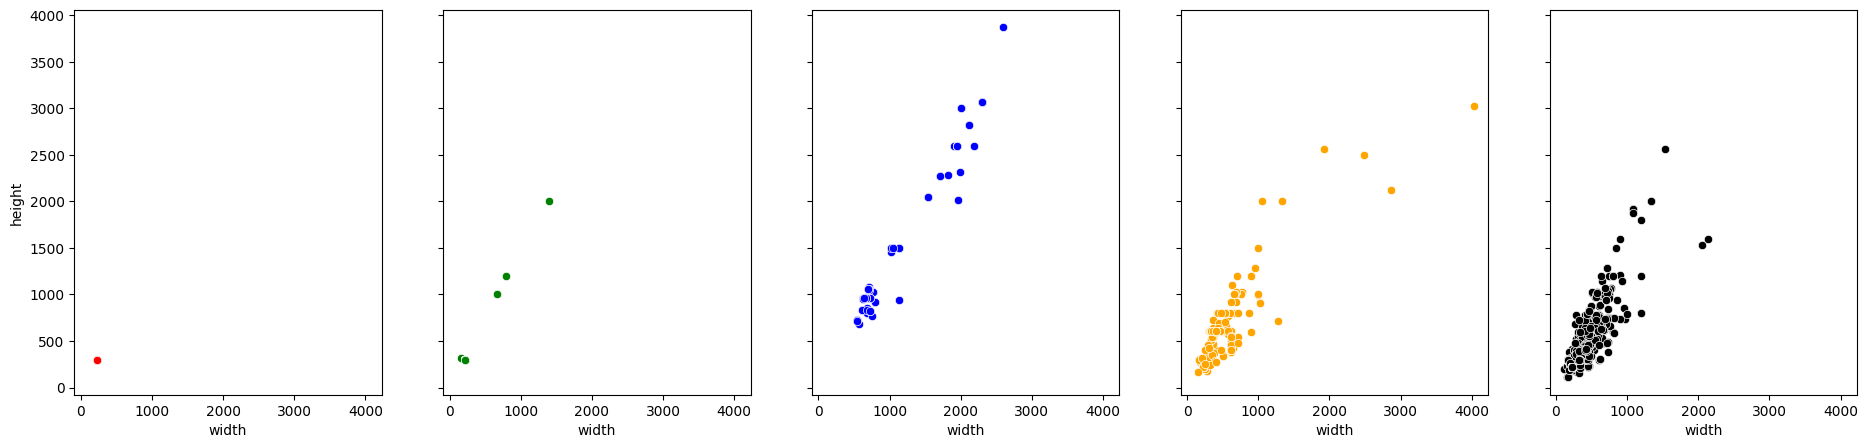

In [9]:
# seaborn subplot
fig, ax = plt.subplots(1, 5, figsize=(23, 5), sharey=True, sharex=True)

sns.scatterplot(ax=ax[0], data=df_acne, x="width", y="height", color='red')
sns.scatterplot(ax=ax[1], data=df_cyst, x="width", y="height", color='green')
sns.scatterplot(ax=ax[2], data=df_melanoma,x="width", y="height", color='blue')
sns.scatterplot(ax=ax[3], data=df_normal, x="width",y="height", color='orange')
sns.scatterplot(ax=ax[4], data=df_moneypox,x="width", y="height", color='black')

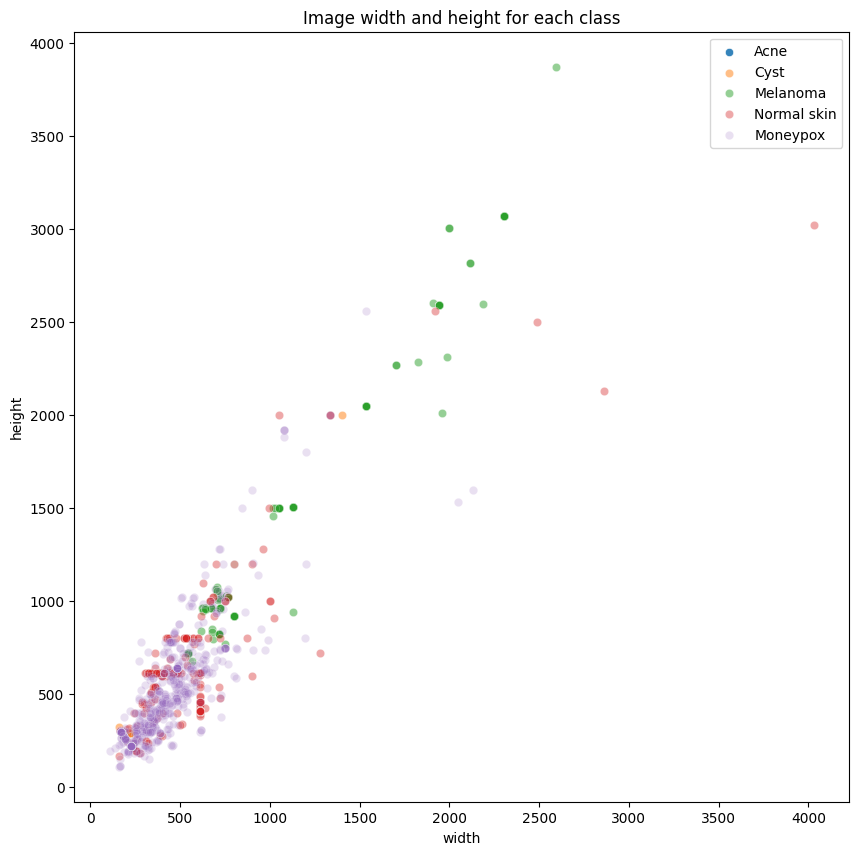

In [10]:
# seaborn scatterplot
# change plot size
plt.figure(figsize=(10, 10))
sns.scatterplot(data=df_acne, x="width", y="height", alpha=0.9,)
sns.scatterplot(data=df_cyst, x="width", y="height", alpha=0.5)
sns.scatterplot(data=df_melanoma, x="width", y="height", alpha=0.5)
sns.scatterplot(data=df_normal, x="width", y="height", alpha=0.4)
sns.scatterplot(data=df_moneypox, x="width", y="height", alpha=0.2)

plt.title('Image width and height for each class')
plt.legend(['Acne', 'Cyst', 'Melanoma', 'Normal skin', 'Moneypox'])

In [11]:
# RGB composition

In [12]:
directory = 'datathon 2022 dataset'
# ims = 256
image_size = (222, 294)
# Generates a tf.data.Dataset from image files in a directory.
df = tf.keras.utils.image_dataset_from_directory(
    directory,
    labels='inferred',
    label_mode='int',
    class_names=None,
    color_mode='rgb',
    batch_size=32,
    image_size=image_size,
    shuffle=True,
    seed=1,
    validation_split=None,
    subset=None,
    interpolation='lanczos5',
    crop_to_aspect_ratio=False,
)
class_names = df.class_names

Found 2985 files belonging to 5 classes.


In [66]:
def verify_jpeg_image(file_path):
    try:
        img = Image.open(file_path)
        img.getdata()[0]
    except OSError:
        return True
    return False

path = 'datathon 2022 dataset'
corrupted_count = 0


for filename in os.listdir('datathon 2022 dataset'):
    listdir = os.listdir(os.path.join(path, filename))

    for img in listdir:
        impath = str(os.path.join(path, filename,img))
        corrupted_count += verify_jpeg_image(impath)

print(corrupted_count)

0


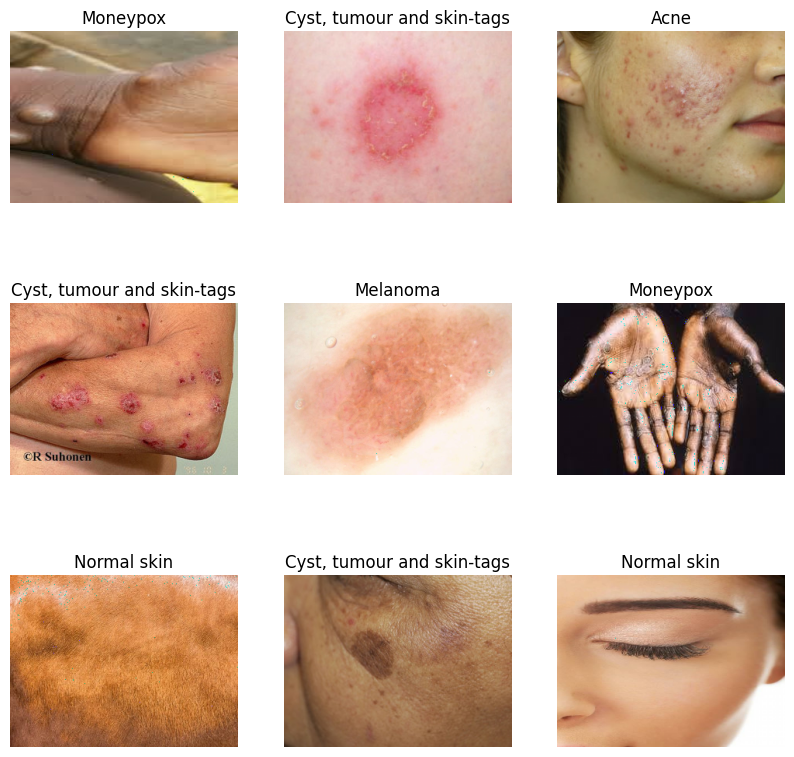

In [21]:
plt.figure(figsize=(10, 10))
for images, labels in df.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[labels[i]])
        plt.axis("off")